## King County House Sales Prediction Using Regression Analysis.

**INTRODUCTION**

The real-estate market is currently experiencing a striking surge in demand and interest. King County is no exception in this. This project aims to understand the existing property market in the area and determine the factors affecting the housing prices. By analyzing our data we will be able to provide actionable insights for prospective home owners and investors.

**BUSINESS UNDERSTANDING**

There is a critical need to advice King County residents on how the price of houses may potentially be influenced by home renovations. The aim is to provide practical ways in which enable them to know which renovations will increase their property value and yield favourable returns.By making informed decisions based on the results of our predictions from our analysis, they can maximize their return on investment.

**OBJECTIVES**

**Main objective:**

To analyze house sales in King County and develop a regression model that accurately predicts house prices.

**Specific objectives:**

1. Explore the King County house sales data to identify the key factors influencing property prices through data analysis.
   
2. Employ multilinear regression techniques to develop a reliable predictive model.
   
3. Evaluate the effectiveness of the model to predict house prices.
   
4. Provide actionable insights and recommendations.

**DATA UNDERSTANDING**

The <a href="https://www.kaggle.com/datasets/harlfoxem/housesalesprediction">dataset</a> we are using contains house prices sales for King County. The column names and  description is as follows:

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


**DATA ANALYSIS**

First, we will start by importing the relevant libraries

In [120]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

import scipy as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [3]:
#loading the csv file
df = pd.read_csv('kc_house_data.csv')
df 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [47]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [10]:
#checking the total number of missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

From the information above, we can see that there are missing values,different data types, categorical and numerical variables. We will now clean the data.

In [11]:
new_data = df.copy()

# Change to datetime and add month column
new_data['date'] = pd.to_datetime(new_data['date'])
new_data['month'] = pd.DatetimeIndex(new_data['date']).month

**handling missing values:**

Since there are 63 missing values in the view column,we can choose to drop but instead we will replace with NONE. We will also change the categories to values.

In [13]:
df.view.value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [36]:
new_data.loc[df.view.isnull(), 'view'] = "NONE"
view_dict = {'NONE':0, 'FAIR':1, 'AVERAGE':2, 'GOOD':3, 'EXCELLENT':4}
new_data['view'].replace(view_dict, inplace=True)


For the waterfront column, the missing values most likely indicate the absence of a waterfront so we will not drop them but instead replace with NO.

In [37]:
df.waterfront.value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [38]:
# Change waterfront missing value to NO, then to binary values.
new_data.loc[df.waterfront.isnull(), 'waterfront'] = 'NO'
new_data['waterfront'] = new_data['waterfront'].apply(lambda x: 0 if x == 'NO' else 1)

In the yr_renovated we will replace the missing values with '0' then create a new column 'renovated' as a binary indicator, with 0 indicating no renovation and 1 indicating the presence of renovation based on the 'yr_renovated' column.

In [39]:
# Change yr_renovated missing values to 0 and add column
new_data.loc[df.yr_renovated.isnull(), 'yr_renovated'] = 0
new_data['renovated'] = new_data['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

We will now confirm if there are any missing values in our dataframe.

In [40]:
if new_data.isnull().sum().sum() == 0:
    print("No")

No


Ensuring all the values are numerical

In [41]:
new_data['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [48]:
# Change condition to numerical ordered values.
cond_dict = {'Poor':0, 'Fair':1, 'Average':2, 'Good':3, 'Very Good':4}
new_data['condition'].replace(cond_dict, inplace=True)

# Change grade to numerical ordered values.
new_data['grade'] = new_data['grade'].map(lambda x: int(str(x).split(' ')[0]))

**checking for duplicates:**

In [44]:
duplicates = new_data.duplicated()
num_duplicates = duplicates.sum()
print(f"Number of duplicates: {num_duplicates}")

Number of duplicates: 0


since there are no duplicates in our dataframe, we are going to the next step which is dropping  the columns that we are not going to use in our analysis.

In [100]:
new_data.drop(columns=['long','lat','id','sqft_above','sqft_basement','yr_renovated'])

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,zipcode,sqft_living15,sqft_lot15,month,renovated
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,2,7,1955,98178,1340,5650,10,0
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,1,0,2,7,1951,98125,1690,7639,12,1
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,1,0,2,6,1933,98028,2720,8062,2,0
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,1,0,4,7,1965,98136,1360,5000,12,0
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,1,0,2,8,1987,98074,1800,7503,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,1,0,2,8,2009,98103,1530,1509,5,0
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,1,0,2,8,2014,98146,1830,7200,2,0
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,1,0,2,7,2009,98144,1020,2007,6,0
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,2,8,2004,98027,1410,1287,1,0


**handling outliers:**

We will use box plots to look for outliers.

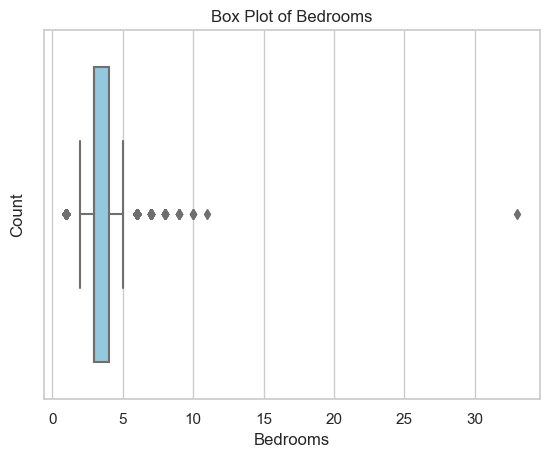

In [55]:
# starting with the bedrooms
# Set Seaborn style
sns.set(style='whitegrid')

# Create a box plot of the 'bedrooms' variable
sns.boxplot(x=new_data['bedrooms'], color='skyblue')

# Add a title and labels
plt.xlabel('Bedrooms')
plt.ylabel('Count')
plt.title('Box Plot of Bedrooms')

# Show the plot
plt.show()

Referring to the table where we desribed the dataframe using inferential statistics, we can see that the maximum number of bedrooms is 33. This is clearly an error but we will look at the other variables for more insight.

In [101]:
specific_rows = new_data.loc[new_data['bedrooms'] ==30]
specific_rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated


According to the number of floors, bathrooms and square feet of the house, it is not possible for this house to have 33 bedrooms so we will change that to 3.

In [57]:
new_data.loc[(new_data.bedrooms == 33), 'bedrooms'] = 3

Checking for outliers in the bathrooms column.

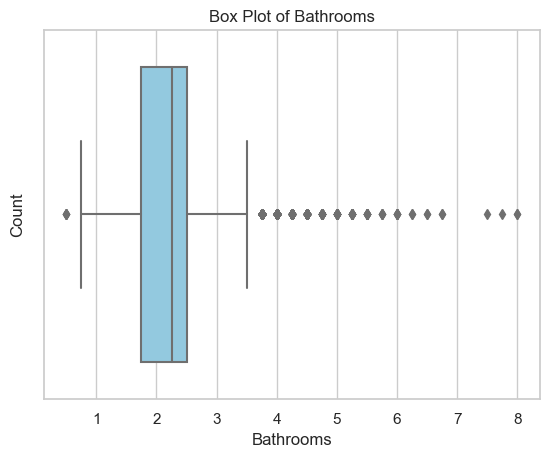

In [58]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create a box plot of the 'bathrooms' variable
sns.boxplot(x=new_data['bathrooms'], color='skyblue')

# Add a title and labels
plt.xlabel('Bathrooms')
plt.ylabel('Count')
plt.title('Box Plot of Bathrooms')

# Show the plot
plt.show()

Checking the prices.

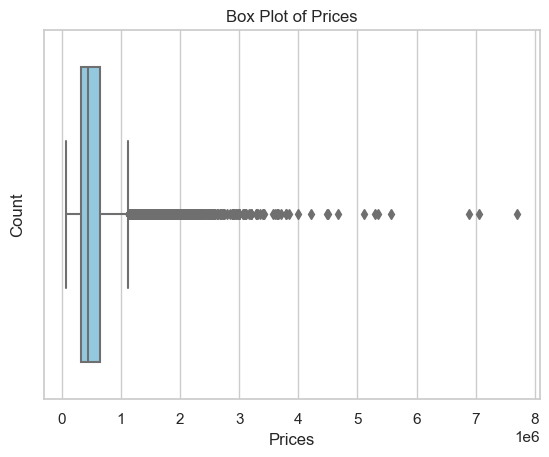

In [60]:
# Set Seaborn style
sns.set(style='whitegrid')

# Create a box plot of the 'prices' variable
sns.boxplot(x=new_data['price'], color='skyblue')

# Add a title and labels
plt.xlabel('Prices')
plt.ylabel('Count')
plt.title('Box Plot of Prices')

# Show the plot
plt.show()

In [62]:
new_data = new_data[(new_data.price < new_data.price.quantile(.995)) 
                     & (new_data.price > new_data.price.quantile(.005))]

The code above filters the dataFrame to include only rows with price values within a specific percentile range, removing extreme values that are above the top 0.5% and below the bottom 0.5% of prices.
This removes any possible outliers.

**Exploratory Analysis:**

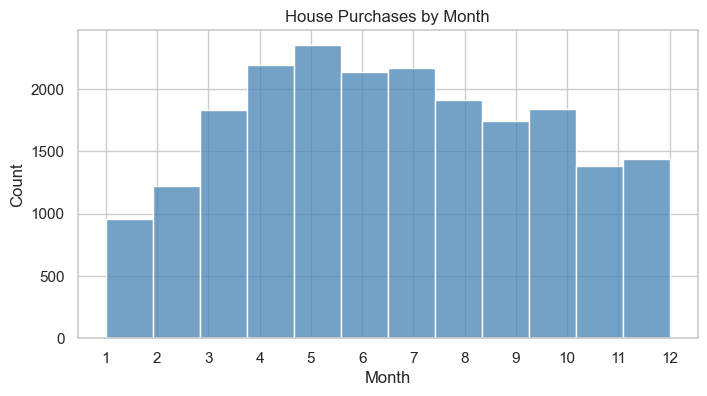

In [99]:
# Convert the 'date' column to datetime format
new_data['date'] = pd.to_datetime(new_data['date'])

# Extract the month from the 'date' column
new_data['month'] = new_data['date'].dt.month

# Plot histogram of house purchases by month
plt.figure(figsize=(8, 4))
sns.histplot(data=new_data, x='month', bins=12, kde=False, color='#4682B4')
plt.title('House Purchases by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(range(1, 13))
plt.show()

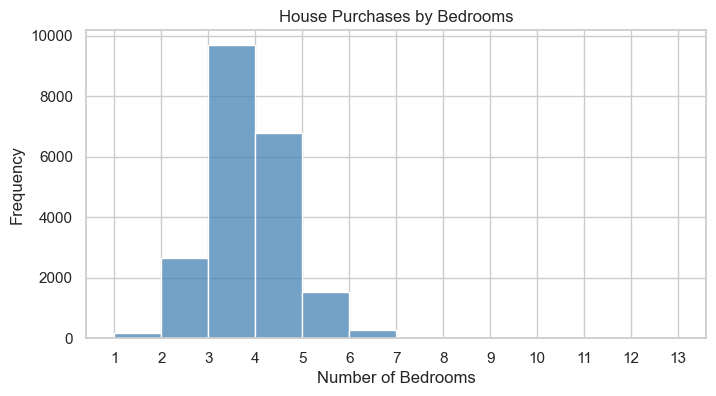

In [102]:
# Plot histogram of house purchases by bedrooms
plt.figure(figsize=(8, 4))
sns.histplot(data=new_data, x='bedrooms', bins=range(1, 14), kde=False, color='#4682B4')
plt.title('House Purchases by Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Frequency')
plt.xticks(range(1, 14))
plt.show()


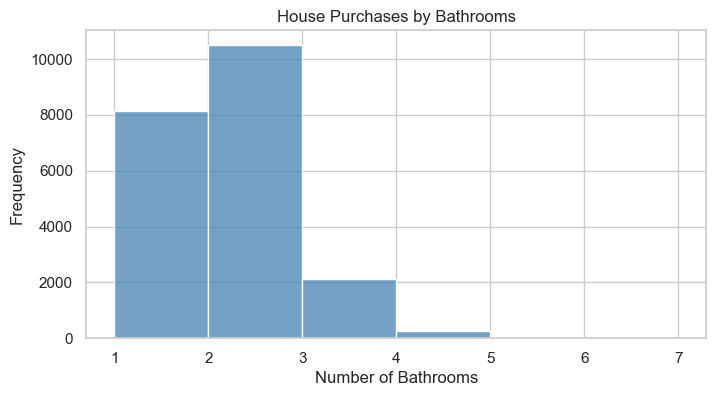

In [103]:
# Plot histogram of house purchases by bathrooms
plt.figure(figsize=(8, 4))
sns.histplot(data=new_data, x='bathrooms', bins=range(1, 8), kde=False, color='#4682B4')
plt.title('House Purchases by Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.xticks(range(1, 8))
plt.show()

*Exploratory analysis summary;-*

1. Most people purchase houses in the month of May and the least purchases are in January.

2. Houses that have 3 bedrooms have the highest sales.

3. Properties having 2 to 3 baths sell more.

**Analyzing categorical variables:**

 The count plots are used to visually explore the distribution of categorical variables (waterfront, view, condition, and grade) in relation to the 'price' variable. By examining the counts of each category, we aim to identify patterns and trends that could influence housing prices. These plots provide insights into the relationships between categorical variables and 'price', helping us understand the factors impacting housing prices in the dataset.

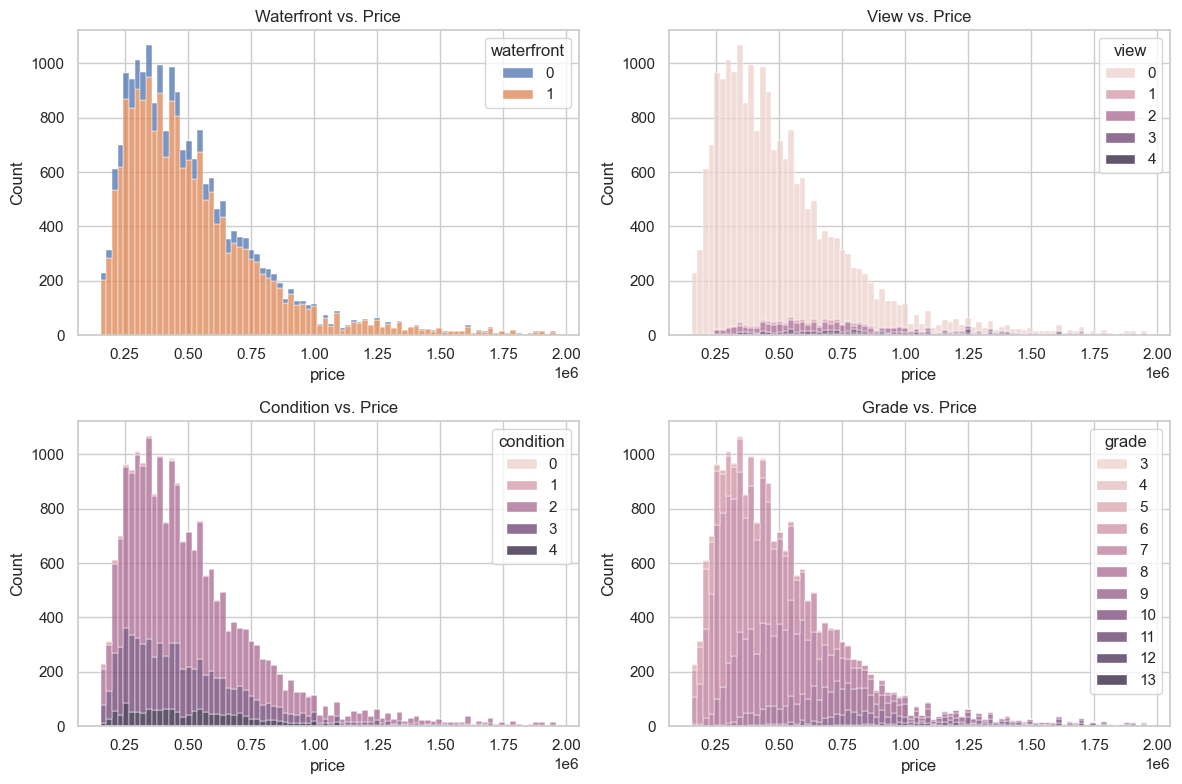

In [86]:
# Create subplots for each categorical variable
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Waterfront vs. Price
sns.histplot(data=new_data, x='price', hue='waterfront', multiple='stack', ax=axes[0, 0])
axes[0, 0].set_title('Waterfront vs. Price')

# View vs. Price
sns.histplot(data=new_data, x='price', hue='view', multiple='stack', ax=axes[0, 1])
axes[0, 1].set_title('View vs. Price')

# Condition vs. Price
sns.histplot(data=new_data, x='price', hue='condition', multiple='stack', ax=axes[1, 0])
axes[1, 0].set_title('Condition vs. Price')

# Grade vs. Price
sns.histplot(data=new_data, x='price', hue='grade', multiple='stack', ax=axes[1, 1])
axes[1, 1].set_title('Grade vs. Price')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

*From this we can summarize that;-*

1. Houses that have a waterfront are usually more expensive.

2. Houses that are in average condition are the most purchased while those is poor condition barely sell.

3. The view from the house does not greatly affect the price because houses with no view are the more expensive than those with one.

***Colinearity between variables:***

We need to select which variables we believe will be the best predictors. First we need to check the colinearity between variables and drop them if necessary.

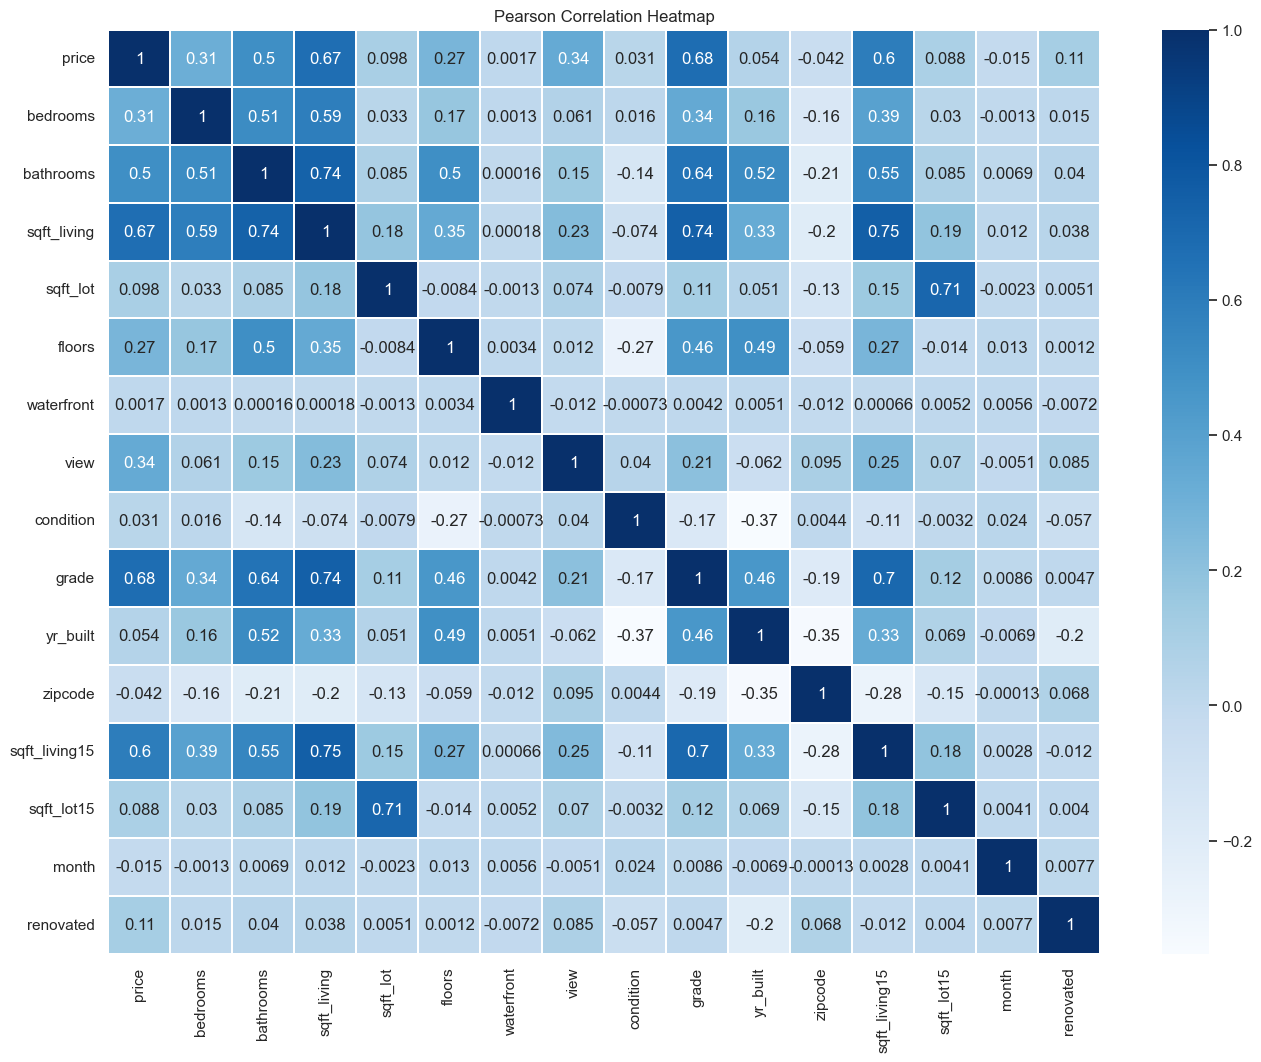

In [76]:
# List of columns to exclude from correlation heatmap
exclude_cols = ['date', 'long', 'lat', 'id', 'sqft_above', 'sqft_basement', 'yr_renovated']

# Get the remaining numerical columns
num_cols = [col for col in new_data.columns if col not in exclude_cols]

# Create DataFrame containing only numerical features
new_data_num = new_data[num_cols]

# Plot the correlation heatmap
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Heatmap')
sns.heatmap(new_data_num.corr(), linewidths=0.25, annot=True, cmap="Blues")
plt.show()

- Sqft_living and grade are highly positively related to price.

 **MODELLING:**

We now have a good idea of which features might affect the price of a house in King County after our analysis. We will now focus on developing a linear regression model to predict the price of a house. For this project, we will be fitting our regression line using the ordinary least squares regression.

For our base model, we will exclude the id, month, year_built, lat, long,yr_renovated and zipcode columns. These variables do not provide intrinsic value in the prediction of prices.

 - **Model 1:**

It will include; sqft_living, view, bathrooms and bedrooms.

- **Model 2:**

It will have additional variables which are grade,condition,waterfront and yr_built

In [107]:
#Selecting the features we are interested in:
df_model1 = df.drop(['sqft_lot','date','waterfront', 'condition', 'grade', 'sqft_above', 'yr_built', 'sqft_basement','yr_renovated', 'zipcode', 'lat','long','sqft_living15','sqft_lot15'],axis=1)
df_model1

,id,price,bedrooms,bathrooms,sqft_living,floors,view
0,7129300520,221900.0,3,1.00,1180,1.0,NONE
1,6414100192,538000.0,3,2.25,2570,2.0,NONE
2,5631500400,180000.0,2,1.00,770,1.0,NONE
3,2487200875,604000.0,4,3.00,1960,1.0,NONE
4,1954400510,510000.0,3,2.00,1680,1.0,NONE
...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,3.0,NONE
21593,6600060120,400000.0,4,2.50,2310,2.0,NONE
21594,1523300141,402101.0,2,0.75,1020,2.0,NONE
21595,291310100,400000.0,3,2.50,1600,2.0,NONE


Test Train Split: 20% of our data shall be used for testing and 80% will be used for training.

In [108]:
X = df_model1.drop('price', axis=1)
y = df['price']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,id,bedrooms,bathrooms,sqft_living,floors,view
6243,9834201100,4,2.00,1440,2.0,NONE
8986,7795810110,3,1.75,1430,1.0,AVERAGE
9419,1853081250,4,2.75,3120,2.0,NONE
10155,2558630350,4,2.50,2060,1.0,NONE
10436,3362401000,3,2.00,2500,1.5,NONE
...,...,...,...,...,...,...
11964,7853230570,3,2.50,2230,2.0,NONE
21575,4140940150,4,2.75,2770,2.0,NONE
5390,8658300480,4,1.50,1530,1.0,NONE
860,1723049033,1,0.75,380,1.0,NONE


In [110]:
base_train_mean = y_train.mean()
base_train_mean

541519.0094345083

In [111]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

Train R2: 0.0
Test R2: -0.00028681792529150485
----
Train RMSE: 368958.0485742971
Test RMSE: 360906.67557791865


- The baseline model, which predicts the mean value for all houses in the area, demonstrates a low R2 score. On average, the model's predictions deviate by approximately $361,000 from the actual house prices.

**Independent Variables & Their Relation To Price: Model 1**

In [112]:
# creating a dataframe for training data
df_train1 =pd.concat([y_train, X_train], axis = 1)
df_train1

,price,id,bedrooms,bathrooms,sqft_living,floors,view
6243,332500.0,9834201100,4,2.00,1440,2.0,NONE
8986,390000.0,7795810110,3,1.75,1430,1.0,AVERAGE
9419,800000.0,1853081250,4,2.75,3120,2.0,NONE
10155,462000.0,2558630350,4,2.50,2060,1.0,NONE
10436,695000.0,3362401000,3,2.00,2500,1.5,NONE
...,...,...,...,...,...,...,...
11964,440000.0,7853230570,3,2.50,2230,2.0,NONE
21575,572000.0,4140940150,4,2.75,2770,2.0,NONE
5390,299800.0,8658300480,4,1.50,1530,1.0,NONE
860,245000.0,1723049033,1,0.75,380,1.0,NONE


In [113]:
df_model1.corr()['price'].sort_values(ascending=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_20576\1707494444.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_model1.corr()['price'].sort_values(ascending=False)


price          1.000000
sqft_living    0.701917
bathrooms      0.525906
bedrooms       0.308787
floors         0.256804
id            -0.016772
Name: price, dtype: float64

Since sqft_living has the highest correlation, we will use it for our modelling

In [114]:
model_price='price ~ sqft_living'
model_price = ols(model_price, df_model1).fit()
model_price_summ = model_price.summary()
model_price_summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:50:35   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
model_price_train_preds = model_price.predict(X_train)
model_price_test_preds = model_price.predict(X_test)

print(f"Train R2: {r2_score(y_train, model_price_train_preds)}")
print(f"Test R2: {r2_score(y_test, model_price_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, model_price_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, model_price_test_preds, squared = False)}")

Train R2: 0.49248102591707754
Test R2: 0.4934364209286598
----
Train RMSE: 262847.0640099154
Test RMSE: 256832.28945676197


model_price1 shows variation over the base model:
R2 is 0.492 for training and 0.493 for test.
As for our model R2 seems low but RMSE is still high.
We will need to perform more iterations.

**Multiple Regression: Model 1**

To facilitate the iterative training process, we will develop custom functions that automate the model training and evaluation steps, enhancing efficiency and effectiveness.

In [116]:
#this function will take variables and will give us the OLS results.
def model_base(ind_var, data):
    formula = 'price ~ ' + ' + '.join(ind_var)
    model_fit = ols(formula, data).fit()
    model_fit_summ = model_fit.summary()
    return model_fit,model_fit_summ

In [123]:
# function that does the assessment of the model
def assess(model_base):
    
    train_preds=model_base.predict(X_train)
    test_preds=model_base.predict(X_test)
    y_tr = y_train
    y_te = y_test
    print(f"Train R2: {r2_score(y_tr, train_preds)}")
    print(f"Test R2: {r2_score(y_te, test_preds)}")
    print('----')
    print(f"Train RMSE: {mean_squared_error(y_tr, train_preds, squared = False)}")
    print(f"Test RMSE: {mean_squared_error(y_te, test_preds, squared = False)}")

    tr_res= y_tr - train_preds
    te_res= y_te - test_preds
    
    plt.scatter(train_preds, tr_res, label = 'Train')
    plt.scatter(test_preds, te_res, label = 'Test')
    
    plt.axhline(y=0, color = 'blue', label = '0')
    plt.xlabel('Predictions')
    plt.ylabel('Residuals')
    plt.legend()
    plt.show
    
    f, ax = plt.subplots(figsize=(8, 6)) 
    sns.distplot(te_res, hist=True, label="Actual Price")
    sns.distplot(train_preds, hist=True, label="Predicted Price")
    plt.xlabel("Price Scale")
    plt.legend()
    plt.show()
    return test_preds

In [124]:
# the main function to model and asses the results
def main_model(ind_var,data):
    multi_model, multi_model_summ = model_base(ind_var,data)
    assessment = assess(multi_model)
    #qq = sm.graphics.qqplot(multi_model.resid, dist=stats.norm, line='45', fit=True)
    print('        ')
    print('This is the summary of the model')
    print('        ')
    print(multi_model_summ)   
    print('        ')
    print('This is the residual plot and qq plot')
    print('        ')
    print(assessment)
    #print(qq)

Train R2: 0.49248102591707754
Test R2: 0.4934364209286598
----
Train RMSE: 262847.0640099154
Test RMSE: 256832.28945676197


C:\Users\HP\AppData\Local\Temp\ipykernel_20576\1941712557.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te_res, hist=True, label="Actual Price")
C:\Users\HP\AppData\Local\Temp\ipykernel_20576\1941712557.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_preds, hist=True, label="Pr

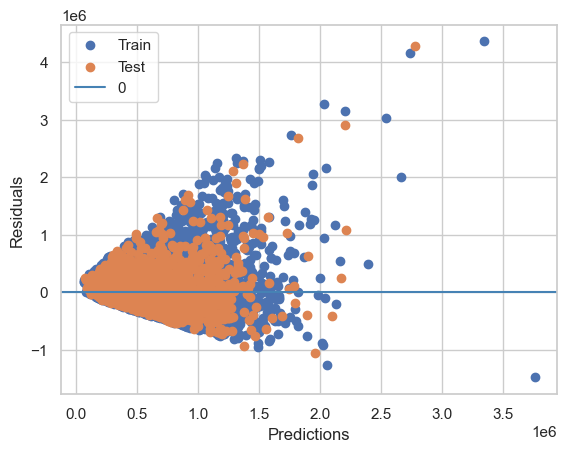

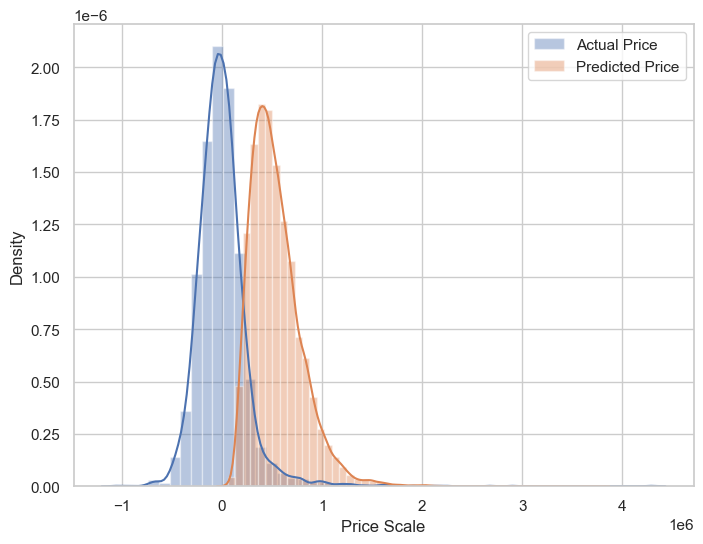

        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:01:30   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [125]:
main_model(['sqft_living'],df_model1)

We will now test our model with two added variables.

Train R2: 0.5079441425192213
Test R2: 0.5021252191780337
----
Train RMSE: 258811.87057821976
Test RMSE: 254620.1129544024


C:\Users\HP\AppData\Local\Temp\ipykernel_20576\1941712557.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te_res, hist=True, label="Actual Price")
C:\Users\HP\AppData\Local\Temp\ipykernel_20576\1941712557.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_preds, hist=True, label="Pr

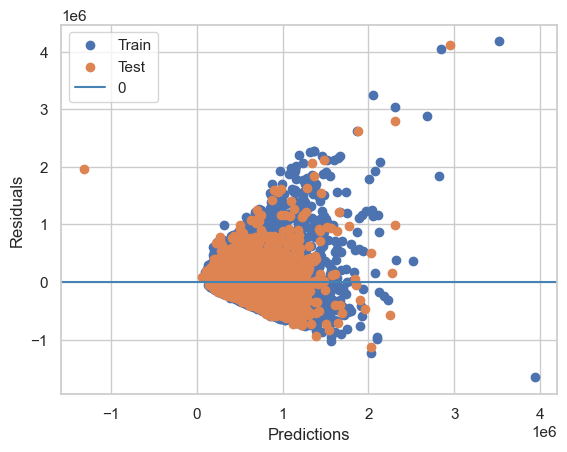

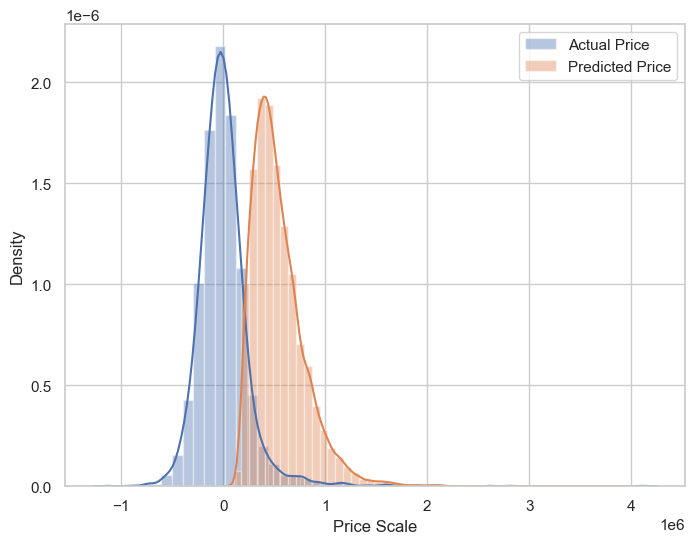

        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                 1.110e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:04:05   Log-Likelihood:            -2.9976e+05
No. Observations:               21597   AIC:                         5.995e+05
Df Residuals:                   21594   BIC:                         5.995e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [126]:
main_model(['sqft_living', 'bedrooms'],df_model1)

The residuals for this model seem to be mostly normally distributed. The tails of the qqplot imply that there are some more outliers that could be eliminated in order to improve the accuracy of the model. Although the RMSE is still high.

- **Model 2:**

In [143]:
new_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,0
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,1,0,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,1
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,1,0,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,0
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,1,0,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,0
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,1,0,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,1,0,...,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5,0
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,1,0,...,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2,0
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,1,0,...,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6,0
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1,0


In [144]:
X = new_data.drop('price', axis=1)
y= new_data['price']

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated
13982,2781280150,2014-08-01,2,2.5,1100,1737,2.0,1,0,2,...,0.0,2006,0.0,98055,47.4499,-122.189,1610,2563,8,0
20645,2937300560,2014-12-12,4,3.5,3640,6049,2.0,1,0,2,...,0.0,2014,0.0,98052,47.7049,-122.125,3590,6104,12,0
6989,3158500460,2015-03-27,3,2.5,2070,4689,2.0,1,0,2,...,0.0,2013,0.0,98038,47.3545,-122.056,1880,4593,3,0
4449,3052700855,2014-06-28,3,1.5,1500,5000,1.5,1,0,3,...,360.0,1927,0.0,98117,47.6790,-122.373,1500,5000,6,0
13759,2113200065,2014-10-27,2,1.0,1010,7740,1.0,0,0,2,...,120.0,1924,0.0,98106,47.5323,-122.355,1030,6000,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11506,7129302800,2014-12-12,3,1.5,1780,5000,1.0,1,4,3,...,750.0,1958,0.0,98118,47.5168,-122.256,1780,7500,12,0
12197,4031000520,2014-11-25,1,2.0,1150,9812,1.0,1,0,3,...,0.0,1962,0.0,98001,47.2951,-122.284,1200,9812,11,0
5502,1089700010,2014-10-08,4,2.5,2329,9436,2.0,1,0,2,...,0.0,1995,0.0,98011,47.7366,-122.204,2660,10252,10,0
876,6204400270,2014-11-25,3,2.0,1910,11576,1.0,1,0,2,...,500.0,1978,0.0,98011,47.7356,-122.198,2040,8750,11,0


In [146]:
base_train_mean = y_train.mean()
base_train_mean

523491.4823284823

In [147]:
base_train_preds = [base_train_mean] * len(y_train)
base_test_preds = [base_train_mean] * len(y_test)

print(f"Train R2: {r2_score(y_train, base_train_preds)}")
print(f"Test R2: {r2_score(y_test, base_test_preds)}")
print('----')
print(f"Train RMSE: {mean_squared_error(y_train, base_train_preds, squared = False)}")
print(f"Test RMSE: {mean_squared_error(y_test, base_test_preds, squared = False)}")

Train R2: 0.0
Test R2: -0.000324713879154892
----
Train RMSE: 286585.49382487254
Test RMSE: 273926.4867676079


In [148]:
df_train=pd.concat([y_train, X_train], axis = 1)
df_train

,price,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,renovated
13982,190000.0,2781280150,2014-08-01,2,2.5,1100,1737,2.0,1,0,...,0.0,2006,0.0,98055,47.4499,-122.189,1610,2563,8,0
20645,939000.0,2937300560,2014-12-12,4,3.5,3640,6049,2.0,1,0,...,0.0,2014,0.0,98052,47.7049,-122.125,3590,6104,12,0
6989,359500.0,3158500460,2015-03-27,3,2.5,2070,4689,2.0,1,0,...,0.0,2013,0.0,98038,47.3545,-122.056,1880,4593,3,0
4449,470000.0,3052700855,2014-06-28,3,1.5,1500,5000,1.5,1,0,...,360.0,1927,0.0,98117,47.6790,-122.373,1500,5000,6,0
13759,289000.0,2113200065,2014-10-27,2,1.0,1010,7740,1.0,0,0,...,120.0,1924,0.0,98106,47.5323,-122.355,1030,6000,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11506,420000.0,7129302800,2014-12-12,3,1.5,1780,5000,1.0,1,4,...,750.0,1958,0.0,98118,47.5168,-122.256,1780,7500,12,0
12197,227000.0,4031000520,2014-11-25,1,2.0,1150,9812,1.0,1,0,...,0.0,1962,0.0,98001,47.2951,-122.284,1200,9812,11,0
5502,540000.0,1089700010,2014-10-08,4,2.5,2329,9436,2.0,1,0,...,0.0,1995,0.0,98011,47.7366,-122.204,2660,10252,10,0
876,390000.0,6204400270,2014-11-25,3,2.0,1910,11576,1.0,1,0,...,500.0,1978,0.0,98011,47.7356,-122.198,2040,8750,11,0


In [149]:
df_model2 =df_train.drop(['sqft_living','lat' ,'long','sqft_basement'],axis=1)

In [150]:
df_model2.corr()['price'].sort_values(ascending=False)

C:\Users\HP\AppData\Local\Temp\ipykernel_20576\1652737185.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_model2.corr()['price'].sort_values(ascending=False)


price            1.000000
grade            0.676126
sqft_living15    0.598281
sqft_above       0.575572
bathrooms        0.496409
view             0.342662
bedrooms         0.311162
floors           0.268512
yr_renovated     0.109388
renovated        0.109035
sqft_lot         0.094413
sqft_lot15       0.087632
yr_built         0.049538
condition        0.030351
waterfront       0.002349
id              -0.020440
month           -0.024693
zipcode         -0.039978
Name: price, dtype: float64

* Grade of the house has the highest correlation with pricefollowed by sqft_living.
* zipcode,id and month seem to have a negative coorelation.

Train R2: 0.5965292881908216
Test R2: 0.5906897857588165
----
Train RMSE: 182037.22693779552
Test RMSE: 175222.47866130839


C:\Users\HP\AppData\Local\Temp\ipykernel_20576\1941712557.py:27: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(te_res, hist=True, label="Actual Price")
C:\Users\HP\AppData\Local\Temp\ipykernel_20576\1941712557.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_preds, hist=True, label="Pr

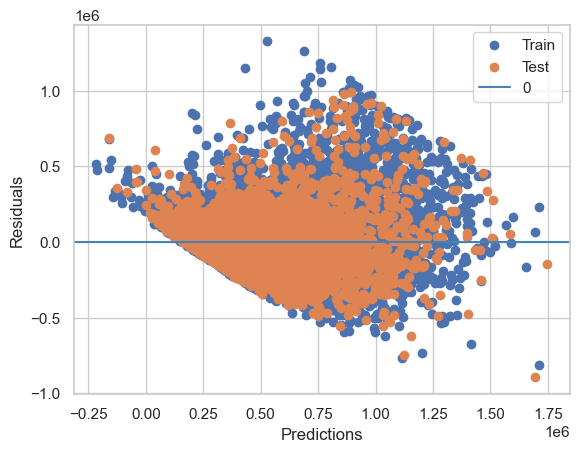

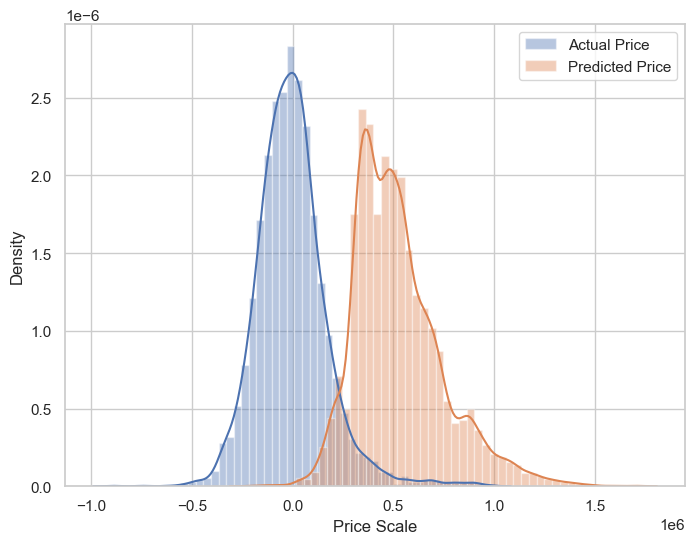

        
This is the summary of the model
        
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     4692.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        19:46:01   Log-Likelihood:            -2.1478e+05
No. Observations:               15873   AIC:                         4.296e+05
Df Residuals:                   15867   BIC:                         4.296e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I

In [151]:
main_model(['grade','view','waterfront','bathrooms','yr_built'],df_model2)

To summarize, this model suggests that 'grade', 'view', 'bathrooms', and 'yr_built' are important factors in predicting house prices. However, the 'waterfront' variable does not appear to have a statistically significant impact on the house price, based on its P-value.

#### **Summary of the regression results:** 

1. Grade: A one-unit increase in the 'grade' variable is associated with an average increase in the house price of $167,200.

2. View: Each unit increase in the 'view' variable corresponds to an average increase in the house price of $57,080.

3. Waterfront: The 'waterfront' variable does not appear to have a statistically significant impact on the house price, as its coefficient is not significantly different from zero.

4. Bathrooms: Each additional bathroom in the house is associated with an average increase in the house price of $95,430.

5. Year Built: On average, for each year of increase in the 'yr_built' variable, the house price is estimated to decrease by $3,584.

**CONCLUSIONS AND RECOMMENDATIONS**

- The 'grade' and 'view' variables have a significant positive impact on house prices. 
  * Homeowners can   potentially increase the value of their homes by improving the grade of the property and enhancing the view.

- The number of bathrooms is also an important factor affecting house prices.
  * Adding or renovating bathrooms can contribute to higher property values.

- Presence of a waterfront does not show a significant impact on house prices.
  * Having a waterfront property may not significantly affect its value in this particular dataset.

- The 'yr_built' variable indicates a negative relationship with house prices. 
  * Older houses tend to have lower values, emphasizing the importance of maintaining and updating older properties.